In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-or-real-news/fake_or_real_news.csv


In [2]:
news = pd.read_csv(r'/kaggle/input/fake-or-real-news/fake_or_real_news.csv')
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
news.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6335.0,5280.415627,3038.503953,2.0,2674.5,5271.0,7901.0,10557.0


In [4]:
news['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [5]:
def clean_check():
    print('Check the data N/A values, duplicate and missing values')
    print("N/A values -:",news.isna().sum())
    print('Duplicates -: ',news.duplicated().sum())
    news.info()
    
clean_check()

Check the data N/A values, duplicate and missing values
N/A values -: Unnamed: 0    0
title         0
text          0
label         0
dtype: int64
Duplicates -:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


**OBSERVATION**

1.From above observation we can conclude that there are no duplicated values, no missing values and nor N/A values too.

So there is no need to clean the data.

In [6]:
def data_visual(i):
    return sns.countplot(x = 'label', data=i)

<AxesSubplot:xlabel='label', ylabel='count'>

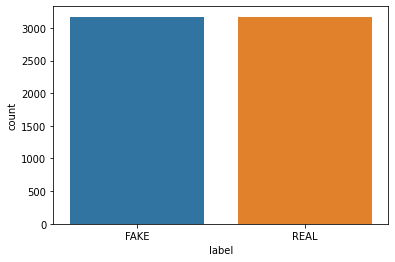

In [7]:
data_visual(news)

Lets remove all irrelevant characters (numbers and punctuations

In [8]:
def irrel(text):
    return re.sub('[^a-zA-Z0-9]',' ',text)

In [9]:
news['text'] = news['text'].apply(irrel)
news['text'].head()

0    Daniel Greenfield  a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U S  Secretary of State John F  Kerry said Mon...
3      Kaydee King   KaydeeKing  November 9  2016 T...
4    It s primary day in New York and front runners...
Name: text, dtype: object

Now converting all characters to lower case

In [10]:
def low_case(text):
    return str(text).lower()

In [11]:
news['text'] = news['text'].apply(low_case)
news['text'].head()

0    daniel greenfield  a shillman journalism fello...
1    google pinterest digg linkedin reddit stumbleu...
2    u s  secretary of state john f  kerry said mon...
3      kaydee king   kaydeeking  november 9  2016 t...
4    it s primary day in new york and front runners...
Name: text, dtype: object

Using Natural Language tool kit, tokenize the words

In [12]:
def tok_wrd(text):
    return word_tokenize(text)

In [13]:
news['text'] = news['text'].apply(tok_wrd)
news['text'].head()

0    [daniel, greenfield, a, shillman, journalism, ...
1    [google, pinterest, digg, linkedin, reddit, st...
2    [u, s, secretary, of, state, john, f, kerry, s...
3    [kaydee, king, kaydeeking, november, 9, 2016, ...
4    [it, s, primary, day, in, new, york, and, fron...
Name: text, dtype: object

Now to remove stopwords i.e is, the, an, to 

In [14]:
st_wrds = set(stopwords.words('english'))
def stp_wrd(text):
    return [item for item in text if item not in st_wrds]

In [15]:
news['text'] = news['text'].apply(stp_wrd)
news['text'].head()

0    [daniel, greenfield, shillman, journalism, fel...
1    [google, pinterest, digg, linkedin, reddit, st...
2    [u, secretary, state, john, f, kerry, said, mo...
3    [kaydee, king, kaydeeking, november, 9, 2016, ...
4    [primary, day, new, york, front, runners, hill...
Name: text, dtype: object

Lemmatizing the words so that we can get the exact meaningful word

In [16]:
lemma = WordNetLemmatizer()
def lem(text):
    return [lemma.lemmatize(i, pos='v') for i in text]

In [17]:
news['text'] = news['text'].apply(lem)
news['text'].head()

0    [daniel, greenfield, shillman, journalism, fel...
1    [google, pinterest, digg, linkedin, reddit, st...
2    [u, secretary, state, john, f, kerry, say, mon...
3    [kaydee, king, kaydeeking, november, 9, 2016, ...
4    [primary, day, new, york, front, runners, hill...
Name: text, dtype: object

In [18]:
corpus = []

for i in news['text']:
    txt = ' '.join([row for row in i])
    corpus.append(txt)
corpus[:5]

['daniel greenfield shillman journalism fellow freedom center new york writer focus radical islam final stretch election hillary rodham clinton go war fbi word unprecedented throw around often election ought retire still unprecedented nominee major political party go war fbi exactly hillary people do coma patients wake watch hour cnn hospital bed would assume fbi director jam comey hillary opponent election fbi attack everyone obama cnn hillary people circulate letter attack comey currently media hit piece lambast target trump surprise clintons ally start run attack ads fbi fbi leadership warn entire leave wing establishment form lynch mob continue go hillary fbi credibility attack media democrats preemptively head result investigation clinton foundation hillary clinton covert struggle fbi agents obama doj people go explosively public new york time compare comey j edgar hoover bizarre headline jam comey role recall hoover fbi fairly practically admit front spout nonsense boston globe p

In [19]:
tf = TfidfVectorizer()
x_fit = tf.fit_transform(corpus).toarray()
x_fit.shape

(6335, 56194)

In [20]:
label_enc = LabelEncoder()
news['label'] = label_enc.fit_transform(news['label'])
news['label']

0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: label, Length: 6335, dtype: int64

In [21]:
x = x_fit
y = news['label']

x.shape, y.shape

((6335, 56194), (6335,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=53)

TO train a ML model on the data, we need to convert these words in numbers

In [23]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
# nb.score(X_train, y_train),nb.score(X_test, y_test)

MultinomialNB()

In [24]:
y_pred = nb.predict(X_test)

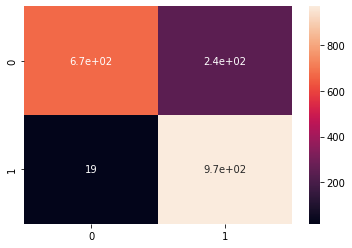

In [25]:
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.73      0.84       913
           1       0.80      0.98      0.88       988

    accuracy                           0.86      1901
   macro avg       0.89      0.86      0.86      1901
weighted avg       0.88      0.86      0.86      1901

